In [ ]:
import scipy.io as spio
from Utilities import *
import pandas as pd
import numpy as np
import os
import csv
import seaborn as sns
import sklearn
from sklearn.manifold import TSNE
%matplotlib inline

# Read Data

## Read expression matrix

In [3]:
expression_matrix = spio.mmread(join_paths(['..', 'RawData', 'pilot_19', 'matrix.mtx']))
expression_matrix = expression_matrix.todense()
expression_matrix

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
expression_matrix = pd.DataFrame(data=expression_matrix)
expression_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Read barcodes
Barcodes are the column names for the expression matrix. Each column is a single cell

In [5]:
barcodes = np.array([])
with open(join_paths(['..', 'RawData', 'pilot_19', 'barcodes.tsv']), 'r') as barcode_file:
    barcode_reader = csv.reader(barcode_file, delimiter='\t')
    for row in barcode_reader:
        barcodes = np.append(barcodes, row)
barcodes

array(['AAACCTGAGTGGAGTC-1', 'AAACCTGCAAACGTGG-1', 'AAACCTGCATTGTGCA-1',
       ..., 'TTTGTCATCGTCGTTC-1', 'TTTGTCATCGTTACGA-1',
       'TTTGTCATCTTATCTG-1'],
      dtype='<U32')

# Preprocess Data

## Normalize Expression Matrix
We start by normalizing so that the new values would correspond to log2(TPM/10+1); TPM is transcript-per-million but because single cells have in the order of (at most) 100,000 counts, we use TPM/10; i.e. divide the counts by the total number of counts, then multiply by 100,000, and then add one and log-transform.

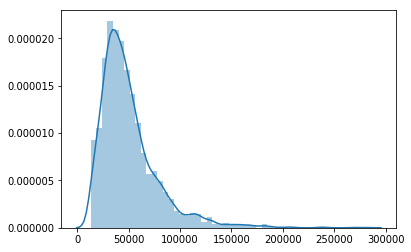

In [29]:
expression_matrix_sums = expression_matrix.sum()
sns.distplot(expression_matrix_sums)

In [37]:
expression_matrix = expression_matrix.div(expression_matrix_sums, axis=1)
expression_matrix = expression_matrix.apply(lambda x: np.log2(x*(10**5)+1))

# Perform Clustering

## Visualize data using tSNE

In [ ]:
expression_tsne = TSNE(n_components=2).fit_transform(expression_matrix)
expression_tsne.head()

In [ ]:
sns.clustermap(data=expression_tsne,